In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('data_processed/subset10k_oneHot.csv')
df2 = pd.read_csv('data_processed/subsetWyniki10_oneHot.csv')

In [45]:
df1['7.5_combined'] = df1['7.5'] | df1['7.5.'] | df1['7.5.)']

In [46]:
merged_df = pd.merge(df1, df2, on='tenderId', how='inner')
merged_df.head()

,Unnamed: 0.1_x,Unnamed: 0_x,orderType,isTenderAmountBelowEU_x,orderObject_x,tenderId,contractors_x,objectId,71521000-6_x,98390000-3_x,...,6.3.),8.4.),4.3.),4.5.1.),4.3.1),5.2.1.),6.4.),6.2.),4.5.5.),7.4.1.)
0,0,0,Delivery,True,Dostawa gazów medycznych wraz z dzierżawą butl...,ocds-148610-65bc0cb3-86a2-11ed-94da-6ae0fe5e7159,NaN,08daec88-a2be-9d2b-100a-0600107fa4a5,0,0,...,875127.64,0.0,0.00,0.0,0.00,0.0,875127.64,875127.64,0.00,0.0
1,1,1,Delivery,True,1-P-23 Akcesoria do urządzeń medycznych,ocds-148610-cd97182f-8a63-11ed-b4ea-f64d350121d2,NaN,08daec89-e42d-79e6-e8e1-8400116e04c3,0,0,...,192952.95,0.0,0.00,0.0,0.00,0.0,192952.95,192952.95,17080.76,0.0
2,2,2,Delivery,True,Sukcesywna dostawa drobnego sprzętu laboratory...,ocds-148610-f8a2c4f0-8a65-11ed-b4ea-f64d350121d2,NaN,08daec8b-e418-1fcc-100a-0600107fa4af,0,0,...,42074.08,0.0,229044.28,0.0,103448.38,0.0,42074.08,42074.08,37393.50,0.0
3,3,3,Delivery,True,2-P-23 Leki i inne produkty lecznicze,ocds-148610-3ee37822-8a68-11ed-94da-6ae0fe5e7159,NaN,08daec8e-7fa7-7790-e8e1-8400116e04d8,0,0,...,134366.04,0.0,0.00,0.0,0.00,0.0,105127.20,105127.20,27313.40,0.0
4,4,4,Delivery,True,Sukcesywna dostawa podstawowych odczynników ch...,ocds-148610-c61d386a-8a6f-11ed-94da-6ae0fe5e7159,NaN,08daec95-45a7-1ee8-100a-0600107fa52d,0,0,...,18798.19,0.0,229044.28,0.0,125595.90,0.0,13367.64,13367.64,12530.89,0.0


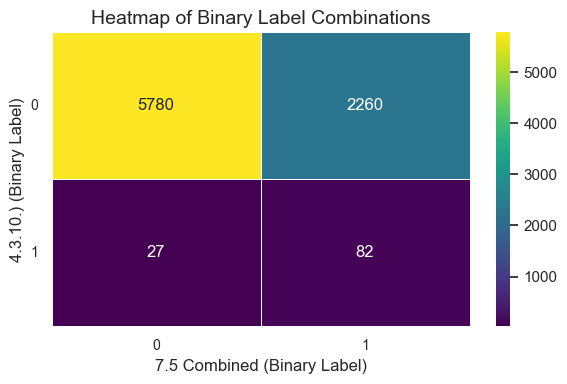

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crosstab to count all combinations
crosstab = pd.crosstab(merged_df["4.3.10.)"], merged_df["7.5_combined"])

# Change the theme
sns.set_theme(style="whitegrid")  # Other styles: darkgrid, white, dark, ticks

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="viridis", cbar=True, linewidths=0.5)

# Add labels and a title
plt.title("Heatmap of Binary Label Combinations", fontsize=14)
plt.xlabel("7.5 Combined (Binary Label)", fontsize=12)
plt.ylabel("4.3.10.) (Binary Label)", fontsize=12)
plt.xticks([0.5, 1.5], ['0', '1'], rotation=0, fontsize=10)
plt.yticks([0.5, 1.5], ['0', '1'], rotation=0, fontsize=10)

# Display the heatmap
plt.tight_layout()
plt.show()


In [54]:
data = merged_df[merged_df["6.2.)"] != 0]
correlation6_2 = data["7.5_combined"].corr(data["6.2.)"])
correlation6_2

np.float64(0.1681527822685642)

In [56]:
data = merged_df[merged_df["8.2.)"] != 0]
correlation8_2 = data["7.5_combined"].corr(data["8.2.)"])
correlation8_2

np.float64(0.1648625258939609)

In [57]:
data = merged_df[merged_df["4.3.1)"] != 0]
correlation4_3_1 = data["7.5_combined"].corr(data["4.3.1)"])
correlation4_3_1

np.float64(0.1009258364788604)

Text(0.5, 1.0, 'correlation of different price measures with consideration of environmental issues')

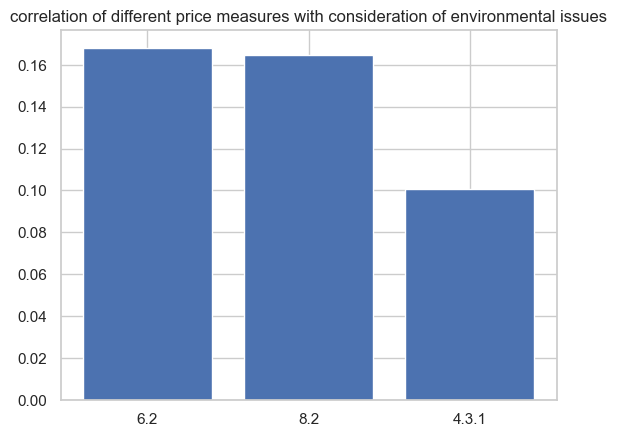

In [59]:
plt.bar(["6.2", "8.2", "4.3.1"], [correlation6_2, correlation8_2, correlation4_3_1])
plt.title("correlation of different price measures with consideration of environmental issues")